In [22]:
%load_ext autoreload
%reload_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
sns.set_style("darkgrid")
from utils import *
import scipy.misc
import glob

def times100(x):
    return 100 * np.max(x)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
log_dir = '../log'
runs = glob.glob("{}/*/".format(log_dir))

subset = ['flip-crop',         
          'flip-crop-cutout', 
          'flip-crop-rainbowout', 
          'flip-crop-channelswap',
          'flip-crop-channelswap-cutout',
          'flip-crop-channelswap-rainbowout']
excludes = ['preact_tester']
results = {}
epochs_to_show = 200
for run in runs:
   
    if (len(subset) == 0 or (len(subset) and run.split('/')[-2] in subset)) and run.split('/')[-2] not in excludes:
        results[run] = read_results('{}/summary_logs/result_summary_statistics.csv'.format(run))
        print('Loading {}, {} epochs'.format(run.split('/')[-2], len(results[run]['epoch'])))
        if len(results[run]['epoch']) < epochs_to_show:
            epochs_to_show = len(results[run]['epoch'])
            
epochs_to_show = 200

Loading flip-crop, 200 epochs
Loading flip-crop-cutout, 200 epochs
Loading flip-crop-channelswap-cutout, 200 epochs
Loading flip-crop-rainbowout, 200 epochs
Loading flip-crop-channelswap-rainbowout, 200 epochs
Loading flip-crop-channelswap, 200 epochs


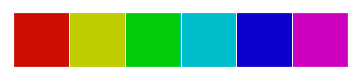

In [27]:
colours = sns.hls_palette(len(results), l=0.4, s=1)#sns.color_palette('bright', len(results))
sns.palplot(colours)

xlims = [0,200]

stats_to_plot = {
    'loss':('Loss', np.min, [-0.001, 0.4]),
    'acc':('Accuracy', times100, [0.7, 1.001])
}

linewidth = 2.5
w = 2
h = np.ceil(len(stats_to_plot)/w)

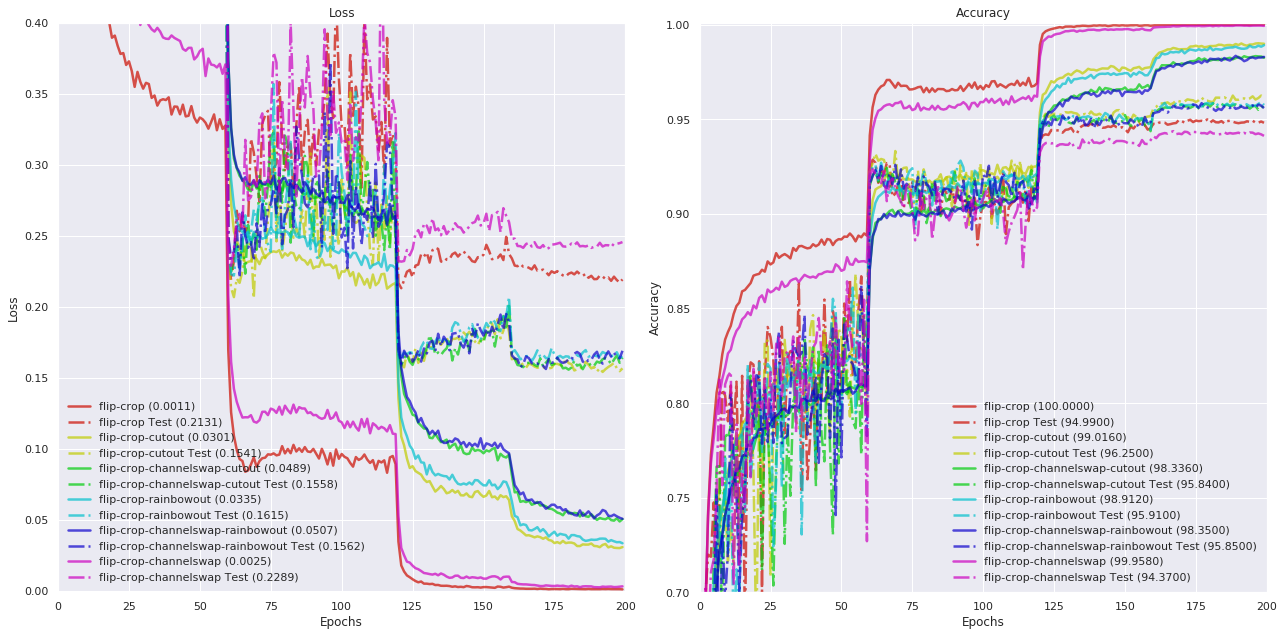

In [28]:
fig = plt.figure(figsize=(18, 9 * h))
ploti = 1


for stat, (title, label_function, ylims) in stats_to_plot.items():
    ax = fig.add_subplot(h, w, ploti)
    allresults = np.array([])
    for i, (run, thisresult) in enumerate(results.items()):
        epochs = thisresult['epoch']
        if len(epochs) > epochs_to_show:
            epochs = epochs[:epochs_to_show]
        train_stat = thisresult['train_{}'.format(stat)]
        if len(train_stat) > epochs_to_show:
            train_stat = train_stat[:epochs_to_show]
        test_stat = thisresult['test_{}'.format(stat)]
        if len(test_stat) > epochs_to_show:
            test_stat = test_stat[:epochs_to_show]

        allresults = np.concatenate((allresults, 
                                     train_stat[(5 if len(train_stat) > 5 else 0):], 
                                     test_stat[(5 if len(test_stat) > 5 else 0):]))
        label = run.split('/')[-2]
        ax.plot(epochs, train_stat, color=colours[i], 
                label='{} ({:0.4f})'.format(label, label_function(train_stat)), alpha=0.7, 
                linewidth=linewidth)
        ax.plot(epochs, test_stat, color=colours[i], linestyle='-.', 
                label='{} Test ({:0.4f})'.format(label, label_function(test_stat)), alpha=0.7, 
                linewidth=linewidth)

    
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.set_xlabel('Epochs')
    ax.set_ylabel(title)
    ax.set_title(title)

    ax.legend(frameon=False)
    ploti+= 1
fig.tight_layout()
fig.savefig('stats.pdf')